In [1]:
import pandas
from utils_missing_data import (sub_dataframe,
                                generate_class_labels,
                                test_data_classification,
                                introduce_nans,
                                report_completeness,
                                test_data_regression,
                                plot_results)

In [2]:
source_file = "data/ankara_aq_data.csv"

nan_row_ratio = 0.99
nan_ratio = 0.9
nan_border = 0.0

ankara_data = pandas.read_csv(source_file)
ankara_data.head()

print("------- COMPLETENESS ------")
report_completeness(ankara_data)
print("---------------------------")

------- COMPLETENESS ------
Overall: 100.0 - COMP ROW: 4721 - COMP ROW PERC%: 100.0
---------------------------


In [3]:
# Report all columns

print("--------- COLUMNS ---------")
print(ankara_data.columns)
print("---------------------------")

--------- COLUMNS ---------
Index(['Unnamed: 0', 'S1_PM10', 'S1_PM25', 'S1_SO2', 'S1_NO2', 'S1_NOX',
       'S1_NO', 'S2_PM10', 'S2_PM25', 'S2_SO2', 'S2_CO', 'S2_03', 'S5_PM10',
       'S5_CO', 'S7_PM10', 'S9_PM10', 'S9_SO2', 'S9_NO2', 'S9_NOX', 'S9_NO',
       'S10_PM10', 'S10_PM25', 'S10_CO', 'S11_PM10', 'S12_CO', 'S13_PM10',
       'S13_PM25', 'S13_SO2', 'S14_PM10', 'S14_PM25', 'S14_SO2', 'S14_NO2',
       'S14_NOX', 'S14_NO', 'S15_PM10', 'S15_SO2', 'S15_NO2', 'S15_NOX',
       'S15_NO', 'S15_O3', 'S17_PM10', 'S17_PM25', 'S17_SO2', 'S17_NO2',
       'S17_NOX', 'S17_NO', 'S17_O3'],
      dtype='object')
---------------------------


In [4]:
stations = ["S" + str(x) for x in range(1, 18)]

print("\nPollutant sensors of each station: \n")

for station in stations:
    colms_str = ""
    for col in sub_dataframe(df=ankara_data, station=station).columns.tolist():
        colms_str += str(col) + " - "
    print(station + "\t: " + colms_str[:-3])

#print(sub_dataframe(ankara_data, station="S1"))


Pollutant sensors of each station: 

S1	: S1_PM10 - S1_PM25 - S1_SO2 - S1_NO2 - S1_NOX - S1_NO
S2	: S2_PM10 - S2_PM25 - S2_SO2 - S2_CO - S2_03
S3	: 
S4	: 
S5	: S5_PM10 - S5_CO
S6	: 
S7	: S7_PM10
S8	: 
S9	: S9_PM10 - S9_SO2 - S9_NO2 - S9_NOX - S9_NO
S10	: S10_PM10 - S10_PM25 - S10_CO
S11	: S11_PM10
S12	: S12_CO
S13	: S13_PM10 - S13_PM25 - S13_SO2
S14	: S14_PM10 - S14_PM25 - S14_SO2 - S14_NO2 - S14_NOX - S14_NO
S15	: S15_PM10 - S15_SO2 - S15_NO2 - S15_NOX - S15_NO - S15_O3
S16	: 
S17	: S17_PM10 - S17_PM25 - S17_SO2 - S17_NO2 - S17_NOX - S17_NO - S17_O3


In [5]:
print("\nColumns with more than 5 pollutant sensors: \n")
for station in stations:
    if len(sub_dataframe(df=ankara_data, station=station).columns.tolist()) >= 5:
        print("\t" + station)


Columns with more than 5 pollutant sensors: 

	S1
	S2
	S9
	S14
	S15
	S17


In [6]:
# Create Sub-frames

s1_data = sub_dataframe(df=ankara_data, 
                        station='S1')
s2_data = sub_dataframe(df=ankara_data, 
                        station='S2')
s9_data = sub_dataframe(df=ankara_data, 
                        station='S9')
s14_data = sub_dataframe(df=ankara_data, 
                         station='S14')
s15_data = sub_dataframe(df=ankara_data, 
                         station='S15')
s17_data = sub_dataframe(df=ankara_data, 
                         station='S17')

In [7]:
# Lets introduce some NaN values

temp_export_directory = "data/temp_export_dir/"

s1_data_org = s1_data.copy()
s2_data_org = s2_data.copy()
s9_data_org = s9_data.copy()
s14_data_org = s14_data.copy()
s15_data_org = s15_data.copy()
s17_data_org = s17_data.copy()

s1_data_nanned = introduce_nans(df=s1_data, row_ratio= nan_row_ratio, ratio=nan_ratio,  border=nan_border)
s2_data_nanned = introduce_nans(df=s2_data, row_ratio= nan_row_ratio, ratio=nan_ratio,  border=nan_border)
s9_data_nanned = introduce_nans(df=s9_data, row_ratio= nan_row_ratio, ratio=nan_ratio,  border=nan_border)
s14_data_nanned = introduce_nans(df=s14_data, row_ratio= nan_row_ratio, ratio=nan_ratio,  border=nan_border)
s15_data_nanned = introduce_nans(df=s15_data, row_ratio= nan_row_ratio, ratio=nan_ratio,  border=nan_border)
s17_data_nanned = introduce_nans(df=s17_data, row_ratio= nan_row_ratio, ratio=nan_ratio,  border=nan_border)


In [8]:
# Export Nanned and Original Data to CSV for inspection

s1_data_nanned.to_csv(temp_export_directory + "nanned.csv")
s1_data_org.to_csv(temp_export_directory + "org.csv")

In [9]:
data_collection = [[s1_data_nanned, s1_data_org],
[s2_data_nanned, s2_data_org],
[s9_data_nanned, s9_data_org],
[s14_data_nanned, s14_data_org], 
[s15_data_nanned, s15_data_org],
[s17_data_nanned, s17_data_org]]

In [10]:
# Show Data Completeness
for data in data_collection:
    print("\n ...")
    print("Nanned Data Completeness")
    report_completeness(df=data[0], detail=True)
    print("\n --------")


 ...
Nanned Data Completeness
Overall completeness: 17.44333827578903
S1_PM10 - 18.47066299512815
S1_PM25 - 17.708112687989825
S1_SO2 - 16.81847066299514
S1_NO2 - 17.220927769540353
S1_NOX - 17.220927769540353
S1_NO - 17.220927769540353
COMP ROW COUNT: 44
COMP ROW PERC%: 0.9320059309468334

 --------

 ...
Nanned Data Completeness
Overall completeness: 21.050624867612797
S2_PM10 - 20.97013344630375
S2_PM25 - 20.97013344630375
S2_SO2 - 20.715950010590973
S2_CO - 21.24549883499259
S2_03 - 21.35140859987291
COMP ROW COUNT: 62
COMP ROW PERC%: 1.3132810845159923

 --------

 ...
Nanned Data Completeness
Overall completeness: 20.86422368142344
S9_PM10 - 21.584410082609622
S9_SO2 - 21.66913789451388
S9_NO2 - 19.656852361787756
S9_NOX - 20.56767633975852
S9_NO - 20.84304172844736
COMP ROW COUNT: 51
COMP ROW PERC%: 1.080279601779284

 --------

 ...
Nanned Data Completeness
Overall completeness: 17.566899668149404
S14_PM10 - 18.216479559415376
S14_PM25 - 17.263291675492482
S14_SO2 - 17.1997458

In [11]:
for data in data_collection:
    report_completeness(df=data[0])

Overall: 17.44333827578903 - COMP ROW: 44 - COMP ROW PERC%: 0.9320059309468334
Overall: 21.050624867612797 - COMP ROW: 62 - COMP ROW PERC%: 1.3132810845159923
Overall: 20.86422368142344 - COMP ROW: 51 - COMP ROW PERC%: 1.080279601779284
Overall: 17.566899668149404 - COMP ROW: 51 - COMP ROW PERC%: 1.080279601779284
Overall: 17.566899668149404 - COMP ROW: 51 - COMP ROW PERC%: 1.080279601779284
Overall: 15.120888431627677 - COMP ROW: 46 - COMP ROW PERC%: 0.9743698368989621


In [12]:
# Export Data to Temporary Csv Files

export_enabled = True

if export_enabled:
    exp_s1_data = generate_class_labels(s1_data_org)
    exp_s2_data = generate_class_labels(s2_data_org)
    exp_s9_data = generate_class_labels(s9_data_org)
    exp_s14_data = generate_class_labels(s14_data_org)
    exp_s15_data = generate_class_labels(s15_data_org)
    exp_s17_data = generate_class_labels(s17_data_org)

    exp_s1_data.to_csv(temp_export_directory + "station_1_org.csv")
    exp_s2_data.to_csv(temp_export_directory + "station_2_org.csv")
    exp_s9_data.to_csv(temp_export_directory + "station_9_org.csv")
    exp_s14_data.to_csv(temp_export_directory + "station_14_org.csv")
    exp_s15_data.to_csv(temp_export_directory + "station_15_org.csv")
    exp_s17_data.to_csv(temp_export_directory + "station_17_org.csv")

    s1_data_nanned.to_csv(temp_export_directory + "station_1_nanned.csv")
    s2_data_nanned.to_csv(temp_export_directory + "station_2_nanned.csv")
    s9_data_nanned.to_csv(temp_export_directory + "station_9_nanned.csv")
    s14_data_nanned.to_csv(temp_export_directory + "station_14_nanned.csv")
    s15_data_nanned.to_csv(temp_export_directory + "station_15_nanned.csv")
    s17_data_nanned.to_csv(temp_export_directory + "station_17_nanned.csv")


In [13]:
results_classification = []

data_out = False

for active_data_tuple in data_collection:
    # For each data, use missing value estimation methods separetely and get classification results

    active_data = active_data_tuple[0]
    original_data = generate_class_labels(active_data_tuple[1])
    #print("Label Counts: " + str(original_data['OUT'].value_counts()))

    # Drop NA
    data_drop_na = active_data.dropna()
    data_drop_na = generate_class_labels(df=data_drop_na)
    rmse_drop_na = test_data_classification(df=data_drop_na,
                                            df_org=original_data,
                                            data_out=data_out)

    # Mean Imputation 
    data_imputed_mean = active_data.copy()
    for col in data_imputed_mean.columns:
        data_imputed_mean[col] = data_imputed_mean[col].fillna(data_imputed_mean.loc[:,col].mean())
    data_imputed_mean = generate_class_labels(df=data_imputed_mean)
    rmse_mean = test_data_classification(df=data_imputed_mean,
                                         df_org=original_data,
                                         data_out=data_out)

    # Zero Imputation 
    data_imputed_zero = active_data.copy()
    for col in data_imputed_zero.columns:
        data_imputed_zero[col] = data_imputed_zero[col].fillna(0)
    data_imputed_zero = generate_class_labels(df=data_imputed_zero)
    rmse_zero = test_data_classification(df=data_imputed_zero,
                                         df_org=original_data,
                                         data_out=data_out)

    # Bfill Imputation
    data_imputed_bfill = active_data.bfill().ffill()
    data_imputed_bfill = generate_class_labels(df=data_imputed_bfill)
    rmse_bfill = test_data_classification(df=data_imputed_bfill,
                                          df_org=original_data,
                                          data_out=data_out)

    # FFill Imputation
    data_imputed_ffill = active_data.ffill().bfill()
    data_imputed_ffill = generate_class_labels(df=data_imputed_ffill)
    rmse_ffill = test_data_classification(df=data_imputed_ffill,
                                          df_org=original_data,
                                          data_out=data_out)

    # Interpolation Imputation
    data_imputed_interpolation = active_data.interpolate().bfill().ffill()
    data_imputed_interpolation = generate_class_labels(df=data_imputed_interpolation)
    rmse_interpolate = test_data_classification(df=data_imputed_interpolation,
                                                df_org=original_data,
                                                data_out=data_out)

    results_classification.append({"DROP": round(rmse_drop_na, 2),
                                   "ZERO": round(rmse_zero, 2),
                                   "MEAN": round(rmse_mean, 2),
                                   "BFILL": round(rmse_bfill, 2),
                                   "FFILL": round(rmse_ffill, 2),
                                   "INTERPOLATE": round(rmse_interpolate, 2)})


/home/metehanguzel/Desktop/projects/TE_ML_U1/utils_missing_data.py:187: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, "OUT"] = AQIs[1:]
/home/metehanguzel/Desktop/projects/TE_ML_U1/utils_missing_data.py:187: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, "OUT"] = AQIs[1:]
/home/metehanguzel/Desktop/projects/TE_ML_U1/utils_missing_data.py:187: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


In [14]:
result_regression_rmse = []
result_regression_mse = []
result_regression_r2 = []

data_out = False

for active_data_tuple in data_collection:
    # For each data, use missing value estimation methods separetely and get classification results

    active_data = active_data_tuple[0]
    original_data = generate_class_labels(active_data_tuple[1])

    # Drop NA
    data_drop_na = active_data.dropna()
    data_drop_na = generate_class_labels(df=data_drop_na)
    rmse_drop_na, mse_drop_na, r2_drop_na= test_data_regression(df=data_drop_na,
                                                                df_org=original_data,
                                                                data_out=data_out)

    # Mean Imputation 
    data_imputed_mean = active_data.copy()
    for col in data_imputed_mean.columns:
        data_imputed_mean[col] = data_imputed_mean[col].fillna(data_imputed_mean.loc[:,col].mean())
    data_imputed_mean = generate_class_labels(df=data_imputed_mean)
    rmse_mean, mse_mean, r2_mean = test_data_regression(df=data_imputed_mean,
                                                        df_org=original_data,
                                                        data_out=data_out)

    # Zero Imputation 
    data_imputed_zero = active_data.copy()
    for col in data_imputed_zero.columns:
        data_imputed_zero[col] = data_imputed_zero[col].fillna(0)
    data_imputed_zero = generate_class_labels(df=data_imputed_zero)
    rmse_zero, mse_zero, r2_zero = test_data_regression(df=data_imputed_zero,
                                                        df_org=original_data,
                                                        data_out=data_out)

    # Bfill Imputation
    data_imputed_bfill = active_data.bfill().ffill()
    data_imputed_bfill = generate_class_labels(df=data_imputed_bfill)
    rmse_bfill, mse_bfill, r2_bfill = test_data_regression(df=data_imputed_bfill,
                                                           df_org=original_data,
                                                           data_out=data_out)

    # FFill Imputation
    data_imputed_ffill = active_data.ffill().bfill()
    data_imputed_ffill = generate_class_labels(df=data_imputed_ffill)
    rmse_ffill, mse_ffill, r2_ffill = test_data_regression(df=data_imputed_ffill,
                                                           df_org=original_data,
                                                           data_out=data_out)

    # Interpolation Imputation
    data_imputed_interpolation = active_data.interpolate().bfill().ffill()
    data_imputed_interpolation = generate_class_labels(df=data_imputed_interpolation)
    rmse_interpolate, mse_interpolate, r2_interpolate = test_data_regression(df=data_imputed_interpolation,
                                                                             df_org=original_data,
                                                                             data_out=data_out)

    result_regression_rmse.append({"DROP": round(rmse_drop_na, 2),
                                   "ZERO": round(rmse_zero, 2),
                                   "MEAN": round(rmse_mean, 2),
                                   "BFILL": round(rmse_bfill, 2),
                                   "FFILL": round(rmse_ffill, 2),
                                   "INTERPOLATE": round(rmse_interpolate, 2)})

    result_regression_mse.append({"DROP": round(mse_drop_na, 2),
                                  "ZERO": round(mse_zero, 2),
                                  "MEAN": round(mse_mean, 2),
                                  "BFILL": round(mse_bfill, 2),
                                  "FFILL": round(mse_ffill, 2),
                                  "INTERPOLATE": round(mse_interpolate, 2)})

    result_regression_r2.append({"DROP": round(r2_drop_na, 2),
                                 "ZERO": round(r2_zero, 2),
                                 "MEAN": round(r2_mean, 2),
                                 "BFILL": round(r2_bfill, 2),
                                 "FFILL": round(r2_ffill, 2),
                                 "INTERPOLATE": round(r2_interpolate, 2)})

/home/metehanguzel/Desktop/projects/TE_ML_U1/utils_missing_data.py:187: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, "OUT"] = AQIs[1:]
/home/metehanguzel/Desktop/projects/TE_ML_U1/utils_missing_data.py:187: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, "OUT"] = AQIs[1:]
/home/metehanguzel/Desktop/projects/TE_ML_U1/utils_missing_data.py:187: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


In [15]:
print("\nClassification Results:\n")
for result in results_classification:
    print(result)


Classification Results:

{'DROP': 0.74, 'ZERO': 0.17, 'MEAN': 0.42, 'BFILL': 0.71, 'FFILL': 0.7, 'INTERPOLATE': 0.7}
{'DROP': 0.41, 'ZERO': 0.22, 'MEAN': 0.49, 'BFILL': 0.76, 'FFILL': 0.75, 'INTERPOLATE': 0.76}
{'DROP': 0.34, 'ZERO': 0.27, 'MEAN': 0.45, 'BFILL': 0.77, 'FFILL': 0.77, 'INTERPOLATE': 0.77}
{'DROP': 0.55, 'ZERO': 0.31, 'MEAN': 0.37, 'BFILL': 0.71, 'FFILL': 0.7, 'INTERPOLATE': 0.71}
{'DROP': 0.11, 'ZERO': 0.4, 'MEAN': 0.39, 'BFILL': 0.79, 'FFILL': 0.78, 'INTERPOLATE': 0.79}
{'DROP': 0.45, 'ZERO': 0.17, 'MEAN': 0.42, 'BFILL': 0.74, 'FFILL': 0.75, 'INTERPOLATE': 0.75}


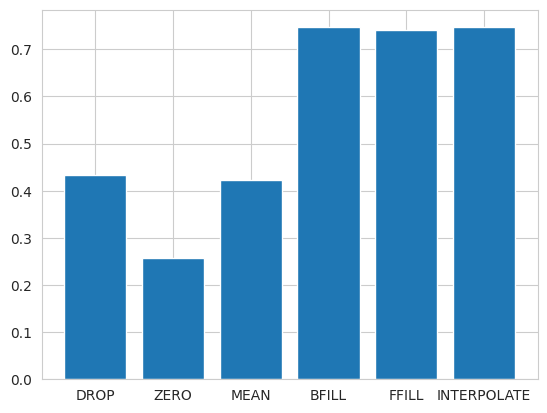

In [16]:
plot_results(data_in=results_classification)

In [17]:
print("\nRegression Results (RMSE):\n")
for result in result_regression_rmse:
    print(result)


Regression Results (RMSE):

{'DROP': 0.7, 'ZERO': 1.15, 'MEAN': 0.78, 'BFILL': 0.5, 'FFILL': 0.51, 'INTERPOLATE': 0.51}
{'DROP': 1.11, 'ZERO': 1.01, 'MEAN': 0.74, 'BFILL': 0.47, 'FFILL': 0.46, 'INTERPOLATE': 0.48}
{'DROP': 0.74, 'ZERO': 1.09, 'MEAN': 0.82, 'BFILL': 0.46, 'FFILL': 0.46, 'INTERPOLATE': 0.46}
{'DROP': 1.18, 'ZERO': 1.08, 'MEAN': 0.88, 'BFILL': 0.52, 'FFILL': 0.53, 'INTERPOLATE': 0.54}
{'DROP': 1.53, 'ZERO': 0.99, 'MEAN': 0.78, 'BFILL': 0.45, 'FFILL': 0.45, 'INTERPOLATE': 0.45}
{'DROP': 1.06, 'ZERO': 1.28, 'MEAN': 0.9, 'BFILL': 0.48, 'FFILL': 0.48, 'INTERPOLATE': 0.48}


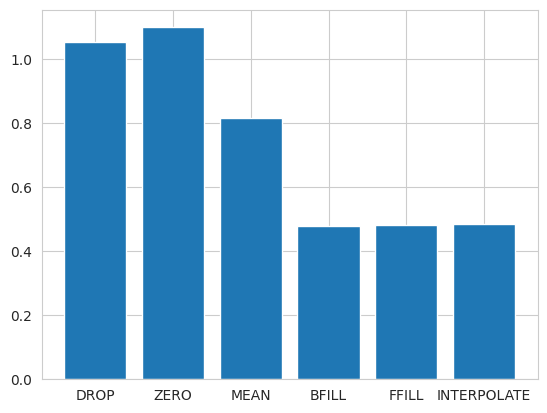

In [18]:
plot_results(data_in=result_regression_rmse)

In [19]:
print("\nRegression Results (MSE):\n")
for result in result_regression_mse:
    print(result)


Regression Results (MSE):

{'DROP': 0.56, 'ZERO': 1.38, 'MEAN': 0.61, 'BFILL': 0.26, 'FFILL': 0.26, 'INTERPOLATE': 0.26}
{'DROP': 1.29, 'ZERO': 1.09, 'MEAN': 0.56, 'BFILL': 0.22, 'FFILL': 0.22, 'INTERPOLATE': 0.23}
{'DROP': 0.58, 'ZERO': 1.24, 'MEAN': 0.68, 'BFILL': 0.21, 'FFILL': 0.21, 'INTERPOLATE': 0.21}
{'DROP': 1.55, 'ZERO': 1.21, 'MEAN': 0.77, 'BFILL': 0.27, 'FFILL': 0.28, 'INTERPOLATE': 0.29}
{'DROP': 2.47, 'ZERO': 1.05, 'MEAN': 0.63, 'BFILL': 0.21, 'FFILL': 0.2, 'INTERPOLATE': 0.2}
{'DROP': 1.31, 'ZERO': 1.72, 'MEAN': 0.85, 'BFILL': 0.24, 'FFILL': 0.24, 'INTERPOLATE': 0.24}


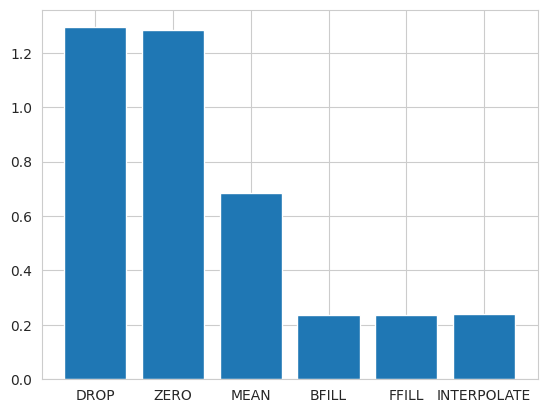

In [20]:
plot_results(data_in=result_regression_mse)

In [21]:
print("\nRegression Results (R2):\n")
for result in result_regression_r2:
    print(result)


Regression Results (R2):

{'DROP': -1.3, 'ZERO': -1.6, 'MEAN': -0.12, 'BFILL': 0.53, 'FFILL': 0.52, 'INTERPOLATE': 0.52}
{'DROP': -3.59, 'ZERO': -0.78, 'MEAN': 0.02, 'BFILL': 0.57, 'FFILL': 0.58, 'INTERPOLATE': 0.53}
{'DROP': -0.84, 'ZERO': -0.92, 'MEAN': -0.15, 'BFILL': 0.64, 'FFILL': 0.64, 'INTERPOLATE': 0.64}
{'DROP': -4.9, 'ZERO': -0.73, 'MEAN': -0.21, 'BFILL': 0.57, 'FFILL': 0.56, 'INTERPOLATE': 0.56}
{'DROP': -9.56, 'ZERO': -0.62, 'MEAN': -0.07, 'BFILL': 0.66, 'FFILL': 0.66, 'INTERPOLATE': 0.66}
{'DROP': -3.4, 'ZERO': -0.95, 'MEAN': 0.04, 'BFILL': 0.72, 'FFILL': 0.72, 'INTERPOLATE': 0.72}


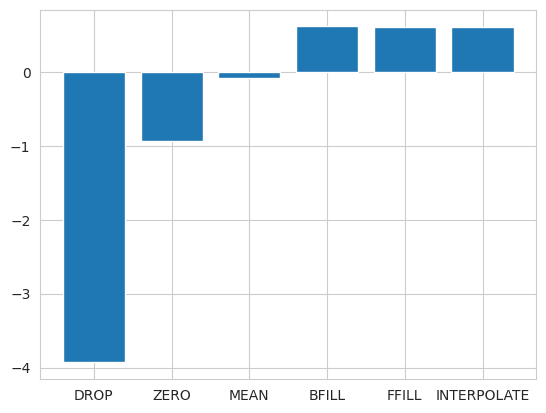

In [22]:
plot_results(data_in=result_regression_r2)